# Suggestion : Make new implementations more robust, by enforcing type errors. 
### Comment: Doens't work the way I expect. I was under the impression that if you declared the variable type in the function it would result in a type error if you gave it of the wrong type.

In [86]:
from typing import List, Dict, Type, Union, Tuple
#nbr = Union(int, float)
# List[Dict[str, object]]

def test_function(number:int=10, name:str="Hanna")->str:
    #return name + " arrived at {}.".format(number)
    print("Only checks that its callable")

In [1]:
import matplotlib.pyplot as plt
import pyaerocom as pya
from pyaerocom.io.readungridded import ReadUngridded
from pyaerocom.io.readgridded import ReadGridded

Initating pyaerocom configuration
Initating pyaerocom configuration
Checking database access...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.012 s
/home/hannas/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/hannas/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Check version of pyaerocom:

In [2]:
pya.__version__ #0.8.1.dev1

'0.8.1.dev1'

Viewing the supported variables. 

In [3]:
pya.browse_database("*GAW*")


Dataset name: GAWTADsubsetAasEtAl
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data
Supported variables: ['sconcso4pr', 'pr', 'wetso4', 'sconcso2', 'sconcso4']
Last revision: n/a


In [4]:
pya.browse_database('EMEP_rv4.1.1.T2.1_ctl')


Pyaerocom ReadGridded
---------------------
Model ID: EMEP_rv4.1.1.T2.1_ctl
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECLIPSE/EMEP_rv4.1.1.T2.1_ctl/renamed
Available experiments: ['EMEP_rv4.1.1.T2.1_CTL', 'EMEP_rv4.1.1.T2.1_ctl']
Available years: [2008, 2009]
Available frequencies ['daily']
Available variables: ['ang44873Daer', 'ec3553Daer', 'ec5503Daer', 'ec5503Dbc', 'ec5503Dnh4', 'ec5503Dno3', 'ec5503Doa', 'ec5503Dpoa', 'ec5503Dso4', 'emibc', 'emico', 'eminh3', 'eminox', 'emioa', 'emiso2', 'emivoc', 'od550aer', 'od550bc', 'od550dust', 'od550nh4', 'od550no3', 'od550oa', 'od550so4', 'od550ss', 'sconc_aeroh2o', 'sconcdust', 'sconchno3', 'sconcnh3', 'sconcnh4', 'sconcno', 'sconcno2', 'sconcno3', 'sconcpm10', 'sconcpm25', 'sconcrdn', 'sconcso2', 'sconcso4', 'sconcss', 'sconctno3', 'vmrco', 'vmro3', 'vmro3max', 'wetoxn', 'wetrdn', 'wetso4', 'z3d']


In [5]:
"""
reader = ReadGridded('EMEP_rv4.1.1.T2.1_ctl')
data = reader.read(var_names = ['sconcso2', 'sconcso4', 'wetso4'], 
                   start = 2008, 
                   stop = 2009, 
                   ts_type = 'daily', 
                   experiment = 'EMEP_rv4.1.1.T2.1_ctl', 
                   flex_ts_type = False, 
                   require_all_vars_avail = False)
"""

"\nreader = ReadGridded('EMEP_rv4.1.1.T2.1_ctl')\ndata = reader.read(var_names = ['sconcso2', 'sconcso4', 'wetso4'], \n                   start = 2008, \n                   stop = 2009, \n                   ts_type = 'daily', \n                   experiment = 'EMEP_rv4.1.1.T2.1_ctl', \n                   flex_ts_type = False, \n                   require_all_vars_avail = False)\n"

In [6]:
#reader.read(vars_to_retrieve="sconcso2")

In [7]:
DATA_ID = 'GAWTADsubsetAasEtAl'
VAR_TO_READ = 'sconcso2'
reader = ReadUngridded(DATA_ID)

In [8]:
reader.supported_datasets

['AeronetInvV3Lev2.daily',
 'AeronetInvV3Lev1.5.daily',
 'AeronetInvV2Lev2.daily',
 'AeronetInvV2Lev1.5.daily',
 'AeronetSDAV2Lev2.daily',
 'AeronetSDAV3Lev1.5.daily',
 'AeronetSDAV3Lev2.daily',
 'AeronetSunV2Lev2.daily',
 'AeronetSunV2Lev2.AP',
 'AeronetSunV3Lev1.5.daily',
 'AeronetSunV3Lev1.5.AP',
 'AeronetSunV3Lev2.daily',
 'AeronetSunV3Lev2.AP',
 'EARLINET',
 'EBASMC',
 'GAWTADsubsetAasEtAl']

In [9]:
reader.vars_to_retrieve

In [10]:
help(reader.read)

Help on method read in module pyaerocom.io.readungridded:

read(datasets_to_read=None, vars_to_retrieve=None, **kwargs) method of pyaerocom.io.readungridded.ReadUngridded instance
    Read observations
    
    Iter over all datasets in :attr:`datasets_to_read`, call
    :func:`read_dataset` and append to data object
    
    Example
    -------
    >>> import pyaerocom.io.readungridded as pio
    >>> from pyaerocom import const
    >>> obj = pio.ReadUngridded(dataset_to_read=const.AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME)
    >>> obj.read()
    >>> print(obj)
    >>> print(obj.metadata[0.]['latitude'])



In [11]:
data = reader.read(datasets_to_read = 'GAWTADsubsetAasEtAl', vars_to_retrieve = ['sconcso2'])
data_sev = reader.read(datasets_to_read = 'GAWTADsubsetAasEtAl', vars_to_retrieve = ['sconcso2', 'sconcso4'])

Found Cache match for GAWTADsubsetAasEtAl
Found Cache match for GAWTADsubsetAasEtAl


In [12]:
data

UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['sconcso2']; instruments: ['3_stage_filterpack', 'passive_sampler', 'abs_solution', 'monitor', 'filter_1pack', '2_stage_filterpack', 'filter_denuder_sampler'];No. of stations: 152

In [13]:
data.station_name

['Abington',
 'Acadia NP',
 'Algoma',
 'Alhambra',
 'Amersfoort',
 'Anholt',
 'Ann Arbor',
 'Arendtsville',
 'Ashland',
 'Aspvreten',
 'Banizoumbou',
 'Barcarrota',
 'Barcombe Mills',
 'Beaufort',
 'Beltsville',
 'Big Bend NP',
 'Birkenes I and II',
 'Blackwater NWR',
 'Bomassa',
 'Bondville',
 'Bredkälen',
 'Cabo de Creus',
 'Caddo Valley',
 'Cadiz',
 'Campisabalos',
 'Candor',
 'Canyonlands NP',
 'Cape Point',
 'Cedar Creek',
 'Centennial',
 'Chalk River',
 'Chapais',
 'Chiricahua NM',
 'Chopok',
 'Claryville',
 'Coffeeville',
 'Connecticut Hill',
 'Coweeta',
 'Cranberry',
 'Crockett',
 'Danki',
 'Deer Creek',
 'Denali NP',
 'Diabla Gora',
 'E.L.A.',
 'Edgar Evins',
 'Egbert',
 'Els Torms',
 'Eskdalemuir',
 'Everglades NP',
 'Georgia Station',
 'Glacier NP',
 'Glen Dye',
 'Gothic',
 'Grand Canyon NP',
 'Great Basin NP',
 'Great Smoky NP - Look Rock',
 'Harwell',
 'Hoburgen',
 'Horton Station',
 'Howland',
 'Hoxeyville',
 'Illmitz',
 'Iskrba',
 'Ispra',
 'Janiskoski',
 'Jarczew',
 'Jo

In [14]:
data_sev

UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['sconcso2', 'sconcso4']; instruments: ['3_stage_filterpack', 'passive_sampler', 'abs_solution', 'monitor', 'filter_1pack', '2_stage_filterpack', 'filter_denuder_sampler', 'filter-1pack', 'filter_3pack', 'filter_2pack', 'pm10_sampler', 'filter-3pack'];No. of stations: 290

In [15]:
data_wetso4 = reader.read(datasets_to_read = 'GAWTADsubsetAasEtAl', vars_to_retrieve = "wetso4")

Found Cache match for GAWTADsubsetAasEtAl


In [16]:
data_wetso4.station_name

['Abington (CT15)',
 'Acadia National Park-McFarland Hill (ME98)',
 'Agronomy Center for Research and Extension (IN41)',
 'Akwesasne Mohawk-Fort Covington (NY22)',
 'Alamosa (CO00)',
 'Algoma',
 'Alhambra (IL46)',
 'Allahabad',
 'Anholt',
 'Ann Arbor (MI52)',
 'Arendtsville (PA00)',
 'Ashland Wildlife Area (MO03)',
 'Aspvreten',
 'Assateague Island National Seashore-Woodcock (MD18)',
 'Attwater Prairie Chicken National Wildlife Refuge (TX10)',
 'Aurora Research Farm (NY08)',
 'BANIZOUMBOU',
 'Babcock State Park (WV04)',
 'Bandelier National Monument (NM07)',
 'Barcarrota',
 "Bay D'Espoir",
 'Bay Road (AL24)',
 'Beaufort (NC06)',
 'Beeville (TX03)',
 'Bellville (GA20)',
 'Bennett Bridge (NY52)',
 'Bennington (VT01)',
 'Big Bend National Park - K-Bar (TX04)',
 'Big Springs Fish Hatchery (IA08)',
 'Birkenes',
 'Biscuit Brook (NY68)',
 'Black Belt Research & Extension Center (AL10)',
 'Bondville (IL11)',
 'Bonner Lake',
 'Bradford Forest (FL03)',
 'Braganca',
 'Bredkälen',
 'Bridgton (ME02

In [17]:
abington = data_wetso4.to_station_data("Abington (CT15)")

In [24]:
help(abington.plot_timeseries)

Help on method plot_timeseries in module pyaerocom.stationdata:

plot_timeseries(var_name, freq=None, resample_how='mean', add_overlaps=False, legend=True, tit=None, **kwargs) method of pyaerocom.stationdata.StationData instance
    Plot timeseries for variable
    
    Note
    ----
    If you set input arg ``add_overlaps = True`` the overlapping timeseries
    data - if it exists - will be plotted on top of the actual timeseries
    using red colour and dashed line. As the overlapping data may be
    identical with the actual data, you might want to increase the line
    width of the actual timeseries using an additional input argumend
    ``lw=4``, or similar.
    
    Parameters
    ----------
    var_name : str
        name of variable (e.g. "od550aer")
    freq : :obj:`str`, optional
        sampling resolution of data (can be pandas freq. string, or
        pyaerocom ts_type).
    resample_how : :obj:`str`, optional
        choose from mean or median (only relevant if input para

/home/hannas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


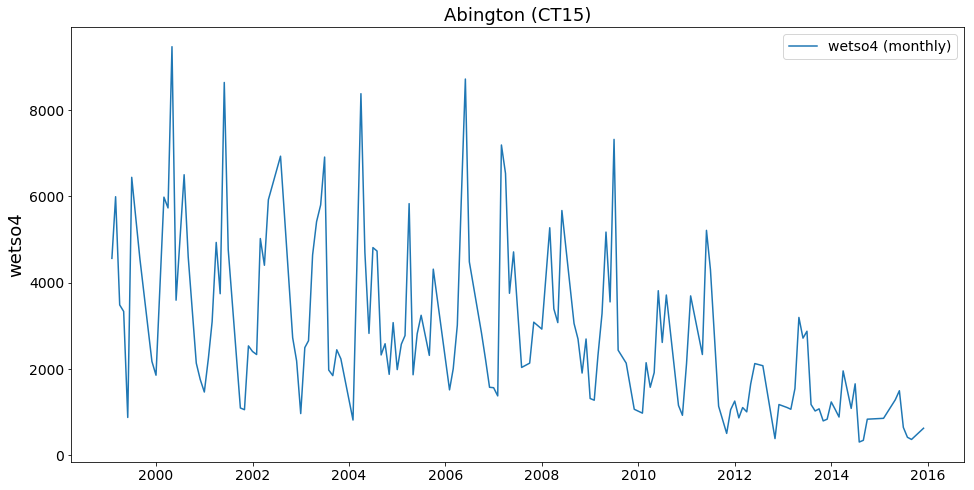

In [18]:
abington.plot_timeseries("wetso4")

## Should this print all the variables? 

In [26]:
data.contains_vars, data_sev.contains_vars

(['sconcso2'], ['sconcso2', 'sconcso4'])

## Merging based on coordinates. 

### Q: Why is this done based on what we want to ignore, not what we are interrested in? 

In [27]:
example_meta = data_sev.metadata[0]

In [28]:
example_meta


OrderedDict([('latitude', 41.84046),
             ('longitude', -72.010368),
             ('altitude', nan),
             ('filename',
              '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so2.csv'),
             ('station_name', 'Abington'),
             ('instrument_name', '3_stage_filterpack'),
             ('ts_type', 'monthly'),
             ('data_id', 'GAWTADsubsetAasEtAl'),
             ('variables', ['sconcso2'])])

In [30]:
ignoring_keys = ["altitude", "filename", "station_name", "instrument_name", "variables" ]

In [22]:
help(data_sev.merge_common_meta)

Help on method merge_common_meta in module pyaerocom.ungriddeddata:

merge_common_meta(ignore_keys=None) method of pyaerocom.ungriddeddata.UngriddedData instance
    Merge all meta entries that are the same
    
    Note
    ----
    If there is an overlap in time between the data, the blocks are not
    merged
    
    Todo
    ----
    Keep mapping of ``var_info`` (if defined in ``metadata``) to data
    points (e.g. EBAS), since the data sources may be at different
    wavelengths.
    
    Parameters
    ----------
    ignore_keys : list
        list containing meta keys that are supposed to be ignored
    
    Returns
    -------
    UngriddedData
        merged data object



In [31]:
merged_meta_sev = data_sev.merge_common_meta(ignore_keys=ignoring_keys)

In [32]:
merged_meta_sev

UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['sconcso2', 'sconcso4']; instruments: [['3_stage_filterpack'], 'passive_sampler', 'abs_solution', ['monitor', 'filter-1pack'], ['abs_solution', 'filter-1pack'], ['abs_solution', '3_stage_filterpack'], 'monitor', ['filter_1pack'], ['3_stage_filterpack', 'filter_1pack'], ['abs_solution', 'filter_3pack'], '3_stage_filterpack', ['3_stage_filterpack', 'filter_3pack'], ['abs_solution', 'filter_1pack'], ['3_stage_filterpack', 'filter-1pack'], ['monitor', 'filter_1pack'], ['2_stage_filterpack', 'filter_2pack'], ['filter_denuder_sampler'], ['3_stage_filterpack', 'filter-3pack'], ['3_stage_filterpack', 'filter_2pack'], '2_stage_filterpack', 'filter-1pack', 'pm10_sampler', 'filter_3pack'];No. of stations: 159

Structure of the metadata in the merged meta data file. 

In [36]:
merged_meta_sev.metadata[0]

OrderedDict([('latitude', 41.84046),
             ('longitude', -72.010368),
             ('altitude', [nan, nan]),
             ('filename',
              ['/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so2.csv',
               '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so4_aero.csv']),
             ('station_name', ['Abington']),
             ('instrument_name', ['3_stage_filterpack']),
             ('ts_type', 'monthly'),
             ('data_id', 'GAWTADsubsetAasEtAl'),
             ('variables', ['sconcso2', ['sconcso4']])])

# Q: Have I done something wrong with storing the varibales like this???


In [37]:
merged_meta_sev.contains_vars

['sconcso2', 'sconcso4']

The first ten station names in the merged dataset.

In [91]:
merged_meta_sev.station_name

[['Abington'],
 ['Acadia NP'],
 ['Algoma'],
 ['Alhambra'],
 'Amersfoort',
 ['Anholt'],
 ['Ann Arbor'],
 ['Arendtsville'],
 ['Ashland'],
 'Aspvreten',
 'Banizoumbou',
 ['Barcarrota'],
 ['Barcombe Mills'],
 ['Beaufort'],
 ['Beltsville'],
 ['Big Bend NP'],
 ['Birkenes I and II'],
 ['Blackwater NWR'],
 'Bomassa',
 ['Bondville'],
 ['Bredkälen'],
 ['Cabo de Creus'],
 ['Caddo Valley'],
 ['Cadiz'],
 'Campisabalos',
 ['Candor'],
 ['Canyonlands NP'],
 'Cape Point',
 ['Cedar Creek'],
 ['Centennial'],
 ['Chalk River'],
 ['Chapais'],
 ['Chiricahua NM'],
 ['Chopok'],
 ['Claryville'],
 ['Coffeeville'],
 ['Connecticut Hill'],
 ['Coweeta'],
 ['Cranberry'],
 ['Crockett'],
 ['Danki'],
 ['Deer Creek'],
 ['Denali NP'],
 ['Diabla Gora'],
 ['E.L.A.'],
 ['Edgar Evins'],
 ['Egbert'],
 ['Els Torms'],
 ['Eskdalemuir'],
 ['Everglades NP'],
 ['Georgia Station'],
 ['Glacier NP'],
 ['Glen Dye'],
 ['Gothic'],
 ['Grand Canyon NP'],
 ['Great Basin NP'],
 ['Great Smoky NP - Look Rock'],
 'Harwell',
 ['Hoburgen'],
 ['Hor

# IDEA : Chould add a boolean "location" == True default to only care about location i.e. latitude, longitude, altitude != np.nan

## Plotting stations maps

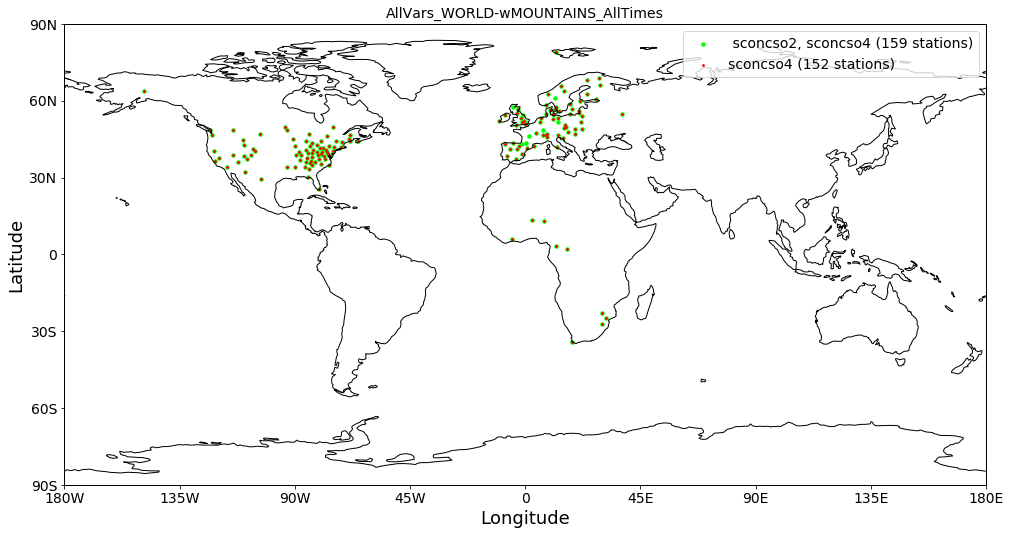

In [34]:
ax = merged_meta_sev.plot_station_coordinates(markersize=12, color='lime', label = " sconcso2, sconcso4")
data.plot_station_coordinates(markersize=3, color='red', ax = ax,  label = "sconcso4")

## Plotting using a dataset which contain one variable

In [40]:
algoma = data.to_station_data('Algoma', 'sconcso2')
abington = data.to_station_data('Abington', 'sconcso2')
alhambra = data.to_station_data('Alhambra', 'sconcso2')

In [42]:
algoma.get_meta()

{'latitude': 47.03,
 'longitude': -84.38,
 'altitude': nan,
 'filename': '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so2.csv',
 'station_name': 'Algoma',
 'instrument_name': '3_stage_filterpack',
 'ts_type': 'monthly',
 'data_id': 'GAWTADsubsetAasEtAl',
 'ts_type_src': 'monthly'}

In [48]:
algoma.country # None

In [49]:
algoma.station_coords

{'latitude': 47.03, 'longitude': -84.38, 'altitude': nan}

In [68]:
def cast_coords_to_string(station):
    """ Help function for creating labels, usefull when plotting several stations.  """
    return "({}, {}, {})".format(station.latitude, station.longitude, station.altitude)

Text(0.5, 1.0, 'Plotting Several Stations In One Figure')

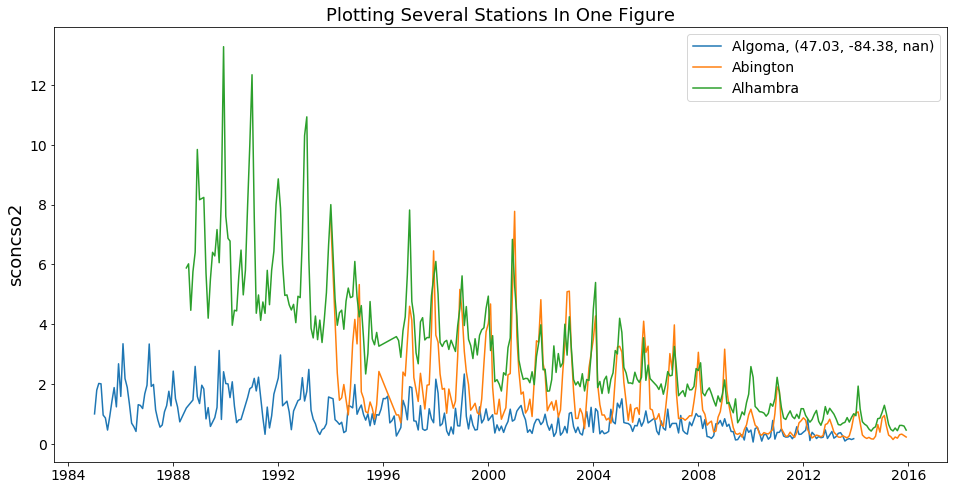

In [69]:
ax = algoma.plot_timeseries('sconcso2', label = algoma.station_name + ", " + cast_coords_to_string(algoma))
abington.plot_timeseries('sconcso2', ax = ax, label = abington.station_name) 
alhambra.plot_timeseries('sconcso2', ax = ax, label = alhambra.station_name) 
ax.set_title("Plotting Several Stations In One Figure")

# Plotting using a dataset which contain several variable

In [72]:
merged_meta_sev.to_station_data('[Algoma]', ['sconcso2', 'sconcso4'])

TypeError: expected str, bytes or os.PathLike object, not list

## How to find common stations with another data set 

After reading one variable, shoudn't the dataset data only contain one variable. This works in the python script.

In [23]:
data.contains_vars

['sconcso2', 'sconcso4', 'sconcSO4precip', 'pr', 'wetso4']

In [24]:
data2.contains_vars

['sconcso4']

## Plotting all available stations for the two variables "sconsso2" and "sconsso4"

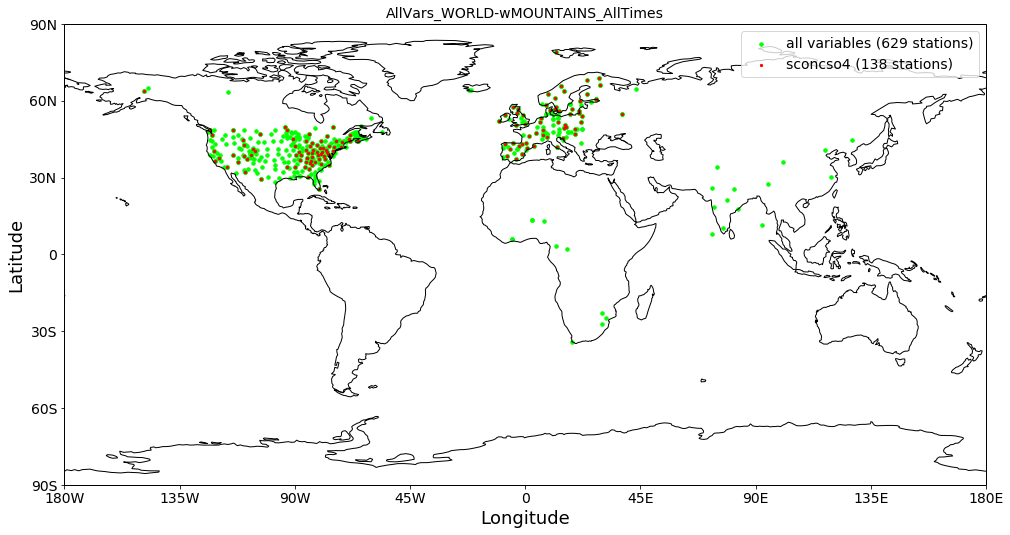

In [25]:
ax = data.plot_station_coordinates(markersize=12, color='lime', label = "all variables")
data2.plot_station_coordinates(markersize=5, color='red', ax = ax,  label = "sconcso4")

In [26]:
merged = data.merge_common_meta(ignore_keys = ["station_name", 'instrument_name', 'ts_type', 'filename'])

In [27]:
len(merged.unique_station_names), len(data.unique_station_names)

(440, 440)

### Displaying the ten first stationnames. 

In [28]:
data.station_name[:10]

['Abington',
 'Acadia NP',
 'Algoma',
 'Alhambra',
 'Amersfoort',
 'Anholt',
 'Ann Arbor',
 'Arendtsville',
 'Ashland',
 'Aspvreten']

In [29]:
algoma = data.to_station_data('Algoma', 'sconcso2')
abington = data.to_station_data('Abington', 'sconcso2')
alhambra = data.to_station_data('Alhambra', 'sconcso2')

In [30]:
algoma.get_meta()

{'latitude': 47.03,
 'longitude': -84.38,
 'altitude': nan,
 'filename': '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/monthly_so2.csv',
 'station_name': 'Algoma',
 'instrument_name': '3_stage_filterpack',
 'ts_type': 'monthly',
 'data_id': 'GAWTADsubsetAasEtAl',
 'ts_type_src': 'monthly'}

# Why does this need a imput variable when algoma only contain one?

/home/hannas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Plotting Several Stations In One Figure')

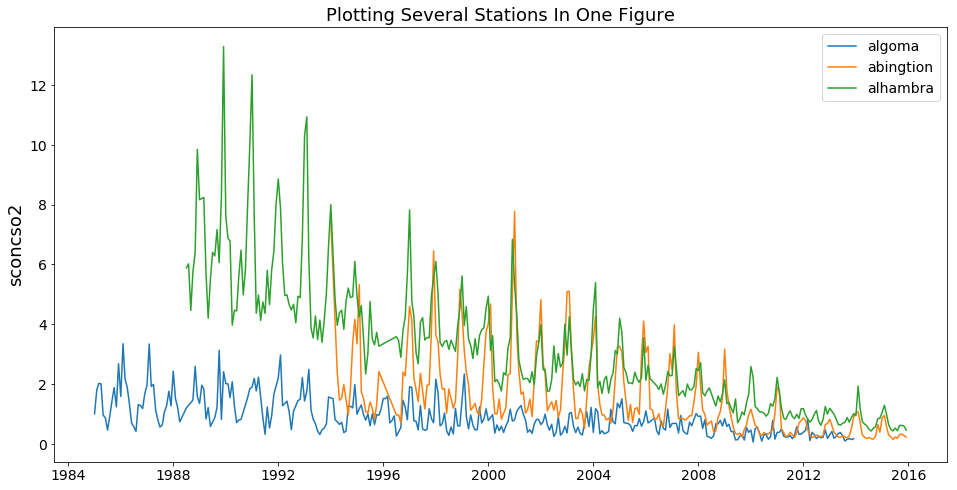

In [31]:
ax = algoma.plot_timeseries('sconcso2', label = "algoma")
abington.plot_timeseries('sconcso2', ax = ax, label = "abingtion") 
alhambra.plot_timeseries('sconcso2', ax = ax, label = "alhambra") 
ax.set_title("Plotting Several Stations In One Figure")

In [32]:
algoma.station_coords

{'latitude': 47.03, 'longitude': -84.38, 'altitude': nan}

In [33]:
help(data.get_variable_data)

Help on method get_variable_data in module pyaerocom.ungriddeddata:

get_variable_data(variables, start=None, stop=None, ts_type=None, **kwargs) method of pyaerocom.ungriddeddata.UngriddedData instance
    Extract all data points of a certain variable
    
    Parameters
    ----------
    vars_to_extract : :obj:`str` or :obj:`list`
        all variables that are supposed to be accessed



In [35]:
hmm = data.get_variable_data("sconcso4")

AttributeError: 'str' object has no attribute 'dtime'

# Below here is old code.

In [ ]:
hmm = data.get_variable_data("sconcso2")

# Find the number of common stations that have both variables

In [ ]:
len(data.find_common_stations(data2))

# Plotting a regional map over stations

In [ ]:
data.plot_station_coordinates(markersize=12, color='lime')

In [ ]:
help(data.plot_station_coordinates)

In [ ]:
data.contains_vars

# Cool function to implement plot_station_coordinates based on stationnames and of they are all in one region it filters outs by itselves.

### How do I remove this print???

In [ ]:
ax = data.plot_station_coordinates(var_name="sconcso2", 
                                   filter_name="EUROPE-noMOUNTAINS",
                                   color='r', marker='o', markersize=8)

# How to retrieve the units from the variable??

In [ ]:
algoma

In [ ]:
reader = ReadSulphurAasEtAl(DATA_ID)
ungridded = reader.read()

In [ ]:
ungridded

In [ ]:
ungridded.unique_station_names[:10]

Is it possible to locate based on coordinates

In [ ]:
import numpy as np

#### This is a bit pequliar 

In [ ]:
len(np.unique(ungridded.latitude)), len(ungridded.unique_station_names)

In [ ]:
help(ungridded.merge_common_meta)

In [ ]:
equal = ungridded.merge_common_meta(ignore_keys = "instruments")

In [ ]:
equal

In [ ]:
algoma.get_meta()

In [ ]:
algoma2 = ungridded["Abington (CT15)"]

In [ ]:
# That one variable can not be stored in the same place.

In [ ]:
from pyaerocom.io.readgridded import ReadGridded
gridded_reader = ReadGridded(data_id = "EMEP_rv4.1.1.T2.1_ctl")
data = gridded_reader.read_var(var_name = 'wetso4', ts_type="daily")